Importing modules

In [1]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

Parameters setting

In [2]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

Loading data

In [ ]:
#main_path = "../input/chest-xray-pneumonia/chest_xray/"
main_path = "chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

['chest_xray\\train/NORMAL\\IM-0115-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0117-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0119-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0122-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0125-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0127-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0128-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0129-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0131-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0133-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0135-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0137-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0140-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0141-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0143-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0145-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0147-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0149-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0151-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0152-0001.jpeg',
 'chest_xray\\train/NORMAL\\IM-0154-0001

In [10]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [11]:
df_train

,class,image
0,Normal,chest_xray\train/NORMAL\IM-0115-0001.jpeg
1,Normal,chest_xray\train/NORMAL\IM-0117-0001.jpeg
2,Normal,chest_xray\train/NORMAL\IM-0119-0001.jpeg
3,Normal,chest_xray\train/NORMAL\IM-0122-0001.jpeg
4,Normal,chest_xray\train/NORMAL\IM-0125-0001.jpeg
...,...,...
5211,Pneumonia,chest_xray\train/PNEUMONIA\person99_virus_183.jpeg
5212,Pneumonia,chest_xray\train/PNEUMONIA\person9_bacteria_38.jpeg
5213,Pneumonia,chest_xray\train/PNEUMONIA\person9_bacteria_39.jpeg
5214,Pneumonia,chest_xray\train/PNEUMONIA\person9_bacteria_40.jpeg


In [12]:
df_test

,class,image
0,Normal,chest_xray\test/NORMAL\IM-0001-0001.jpeg
1,Normal,chest_xray\test/NORMAL\IM-0003-0001.jpeg
2,Normal,chest_xray\test/NORMAL\IM-0005-0001.jpeg
3,Normal,chest_xray\test/NORMAL\IM-0006-0001.jpeg
4,Normal,chest_xray\test/NORMAL\IM-0007-0001.jpeg
...,...,...
619,Pneumonia,chest_xray\test/PNEUMONIA\person96_bacteria_465.jpeg
620,Pneumonia,chest_xray\test/PNEUMONIA\person96_bacteria_466.jpeg
621,Pneumonia,chest_xray\test/PNEUMONIA\person97_bacteria_468.jpeg
622,Pneumonia,chest_xray\test/PNEUMONIA\person99_bacteria_473.jpeg


Exploring the data

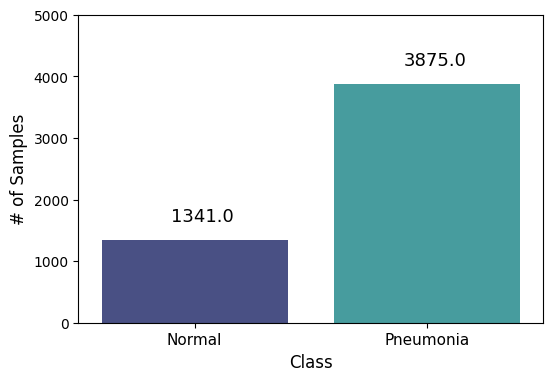

In [14]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

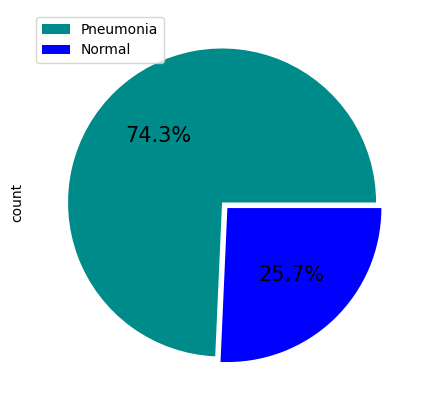

In [15]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

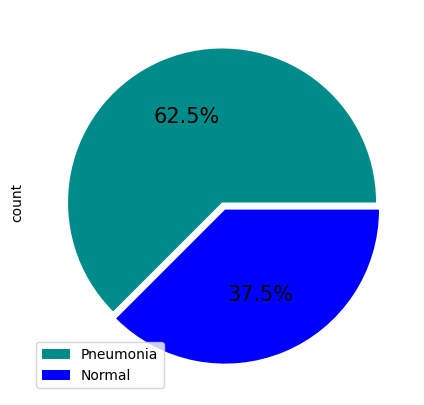

In [16]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

The distributions from these datasets are a little different from each other. Both are slightly imbalanced, having more samples from the positive class (Pneumonia), with the training set being a little more imbalanced.

Before we move on to the next section, we will take a look at a few examples from each dataset.

Train Set - Normal


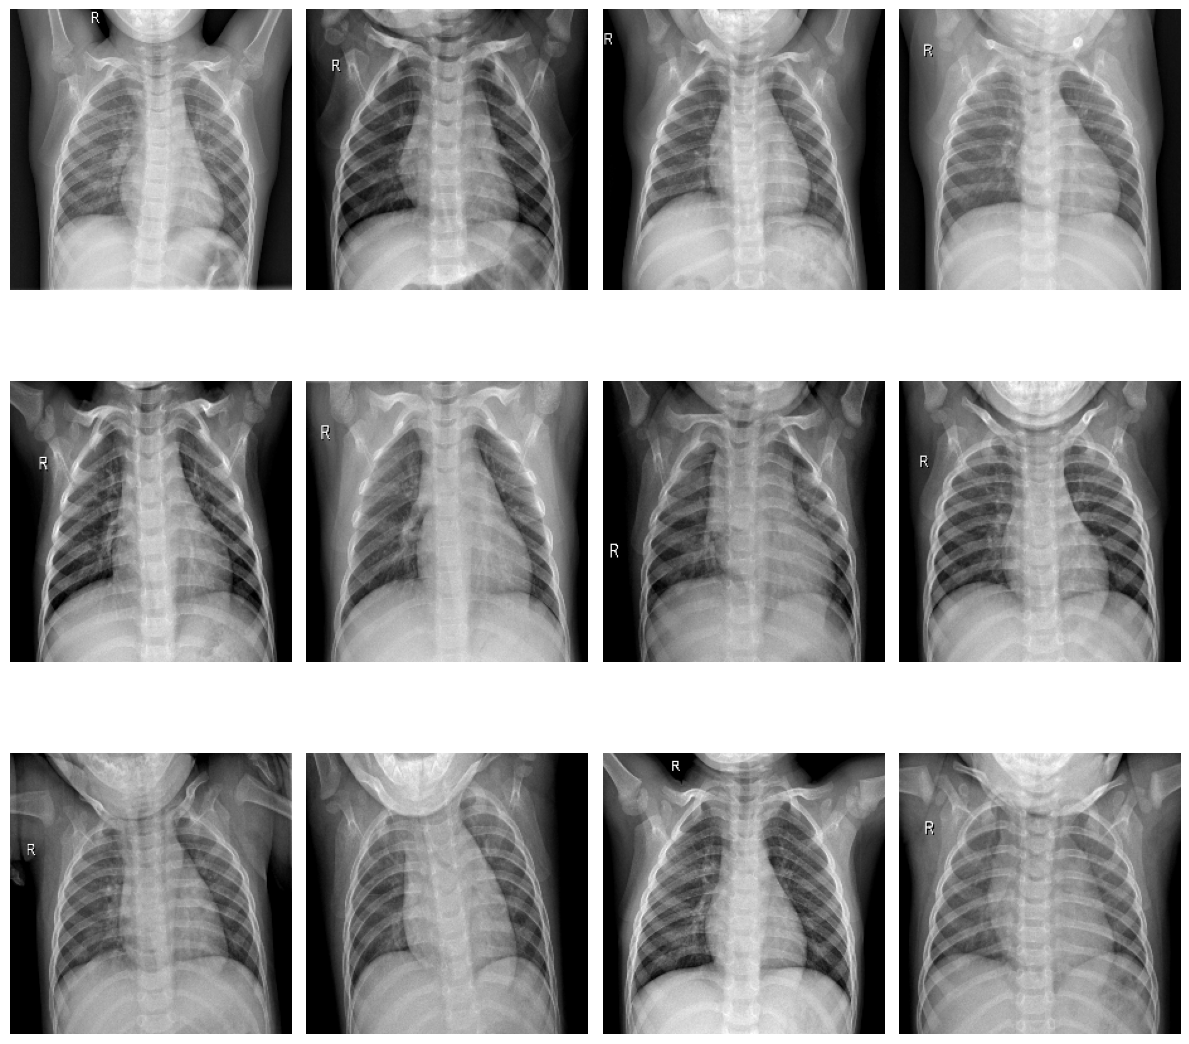

In [17]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


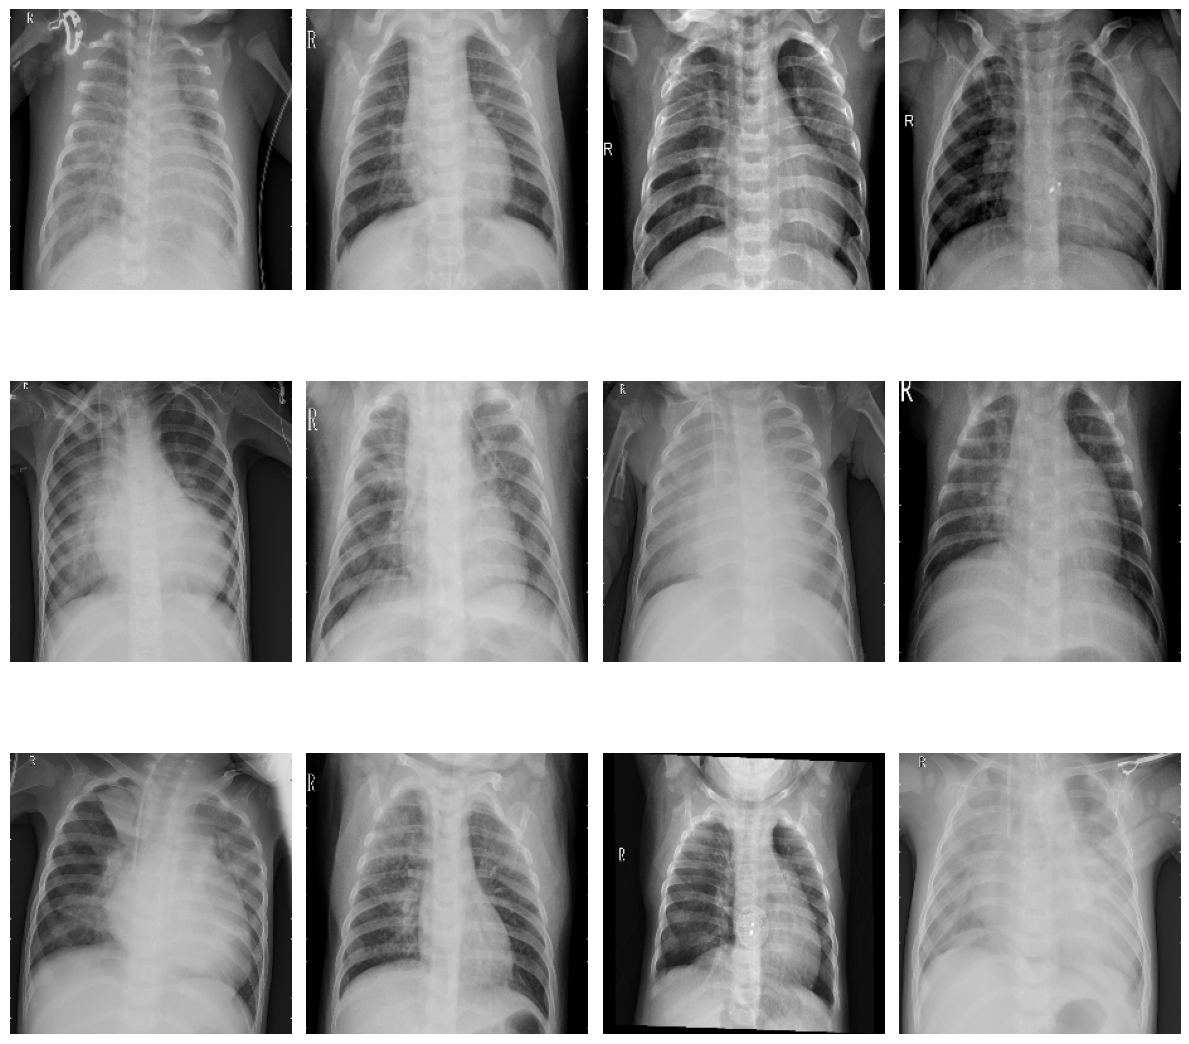

In [18]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


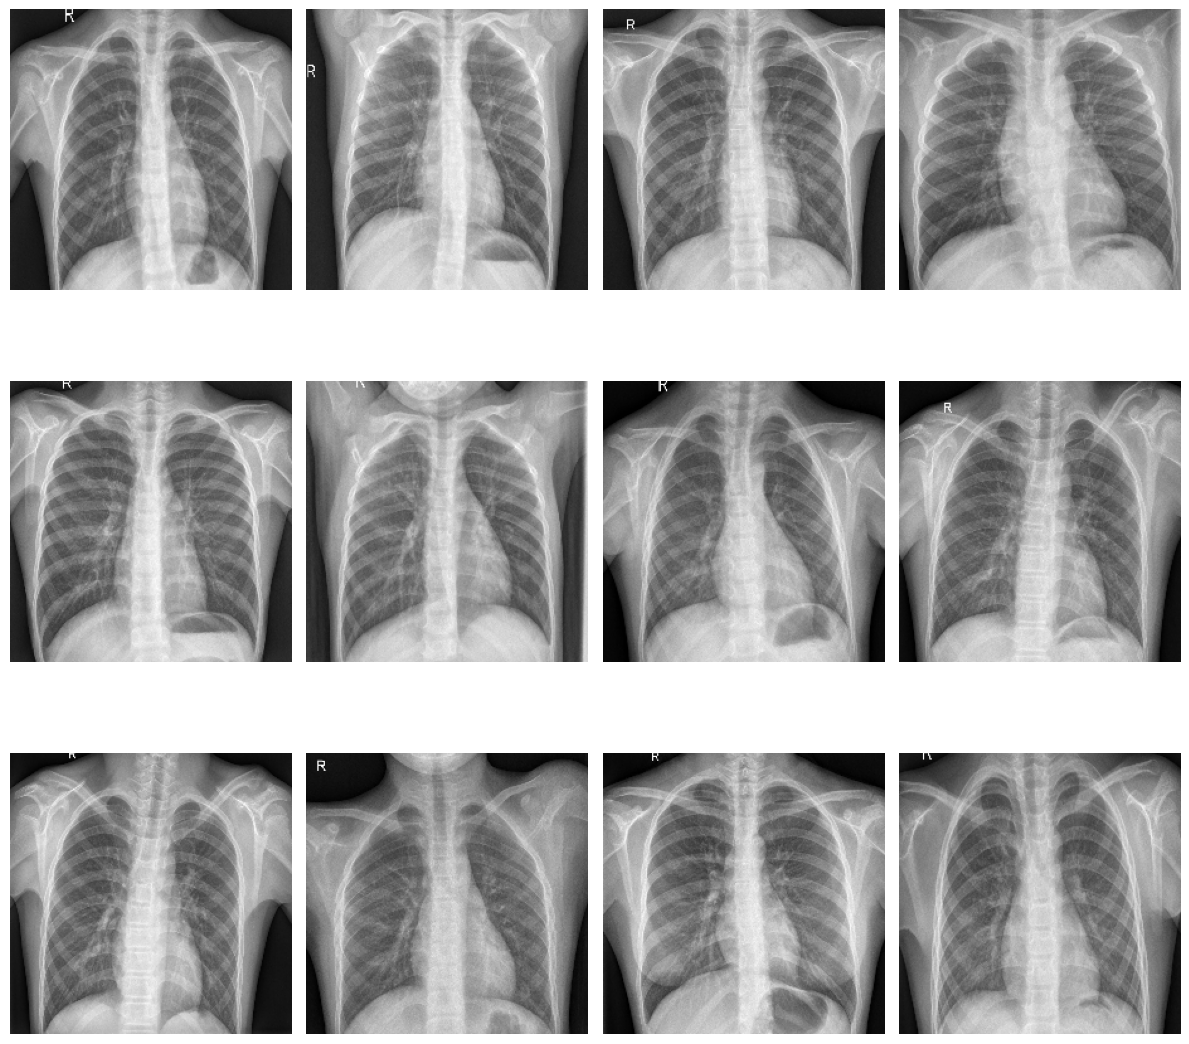

In [19]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


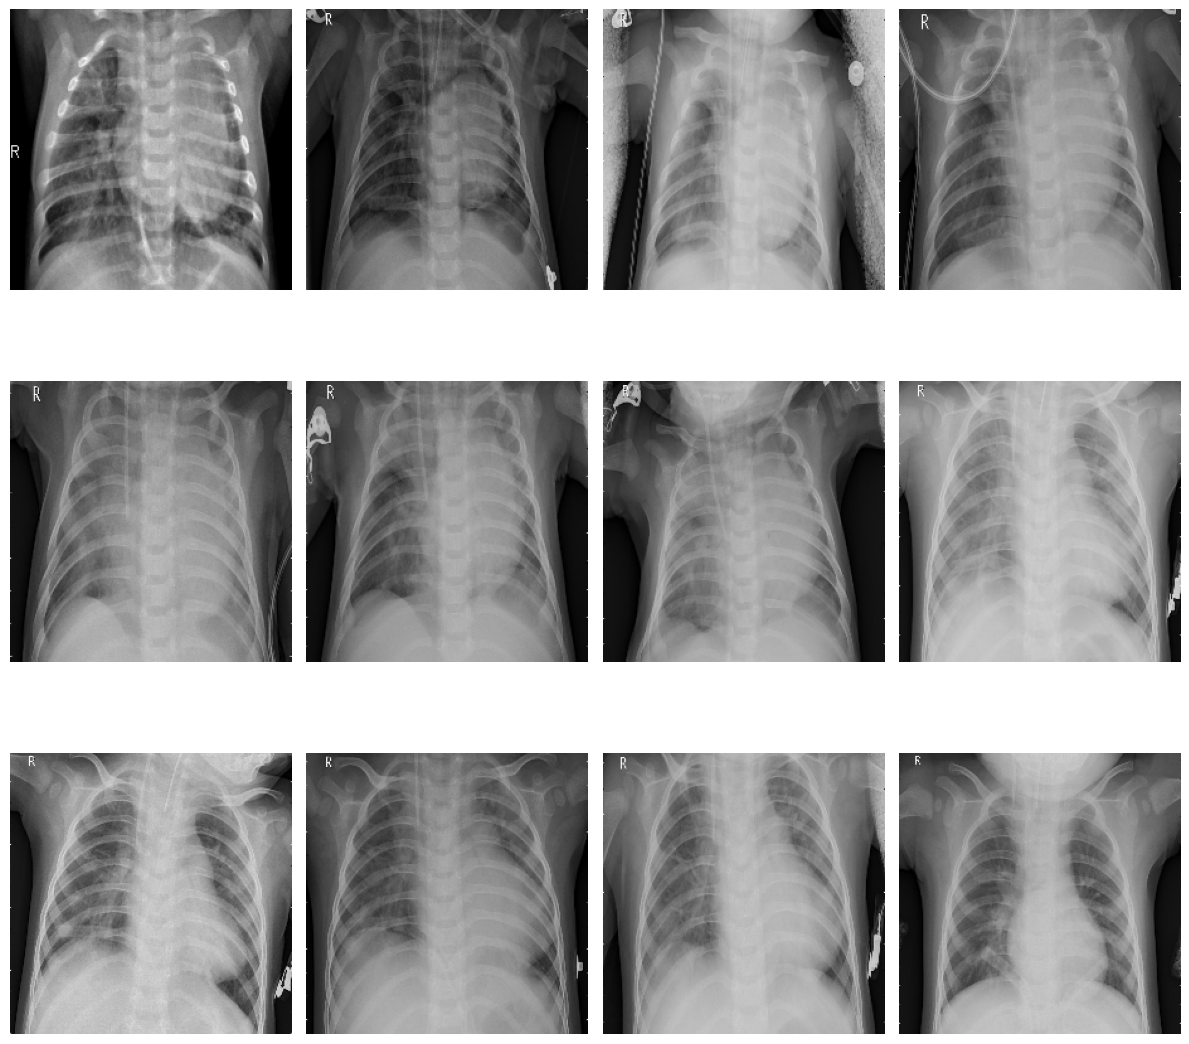

In [20]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Preparing the Data